Crea un conjunto de datos utilizando el siguiente código:

trX = np.linspace(-1, 1, 101)

trY = np.linspace(-1, 1, 101)

for i in range(len(trY)):

trY[i] = math.log(1 + 0.5 * abs(trX[i])) + trX[i] / 3 + np.random.randn() * 0.033

Ahora, utiliza Theano para obtener los parámetros w_0 y w_1 del siguiente modelo:

y%3Dlog(1%26plus%3Bw_%7Bo%7D%20%5Cleft%20%7Cx%20%5Cright%20%7C%20)%26plus%3Bw_%7B1%7D%20x&size=12

utilizando los datos generados anteriormente.

In [1]:
# Preparamos el entorno
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# %config blas.ldflags=-lblas

# importamos las librerias
import pandas as pd  # Python Data Analysis Library
import numpy as np

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Definimos las matrices de valores
trX = np.linspace(-1, 1, 101)
trY = np.linspace(-1, 1, 101)

for i in range(len(trY)):
    trY[i] = math.log(1 + 0.5*abs(trX[i])) + trX[i] / 3 + np.random.randn()*0.033
    
print (trX)
print (trY)

[-1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82 -0.8  -0.78
 -0.76 -0.74 -0.72 -0.7  -0.68 -0.66 -0.64 -0.62 -0.6  -0.58 -0.56 -0.54
 -0.52 -0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3
 -0.28 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06
 -0.04 -0.02  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18
  0.2   0.22  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42
  0.44  0.46  0.48  0.5   0.52  0.54  0.56  0.58  0.6   0.62  0.64  0.66
  0.68  0.7   0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86  0.88  0.9
  0.92  0.94  0.96  0.98  1.  ]
[ 0.08641407  0.09930148  0.10047471  0.09718824  0.06289314  0.09446249
  0.14587342 -0.01345221  0.06207404  0.07215883  0.03534553 -0.00998212
  0.06342833  0.10715211  0.04142672 -0.00262609  0.08866451  0.05915722
  0.03837796  0.12128717  0.06036742  0.08884591  0.05201165  0.06675404
  0.05895828  0.01829594  0.01857822 -0.00888494  0.02982478  0.06278542
  0.07087644  0.06106

En el paso 0 el valor de los parametros es w0: 0.1995907637039501 w1: 0.1682439159596061
En el paso 1 el valor de los parametros es w0: 0.3049823971642476 w1: 0.2539618604398829
En el paso 2 el valor de los parametros es w0: 0.3690308798798897 w1: 0.29595970604138927
En el paso 3 el valor de los parametros es w0: 0.410275293590915 w1: 0.31603944633098685
En el paso 4 el valor de los parametros es w0: 0.4376138837262407 w1: 0.325368935706467
En el paso 5 el valor de los parametros es w0: 0.4560255550432625 w1: 0.3295221649936354
En el paso 6 el valor de los parametros es w0: 0.46854089388503195 w1: 0.3312391051611987
En el paso 7 el valor de los parametros es w0: 0.47709629078025423 w1: 0.33184708386032535
En el paso 8 el valor de los parametros es w0: 0.48296528026943913 w1: 0.3319773744530532
En el paso 9 el valor de los parametros es w0: 0.487000375217017 w1: 0.3319223247664187
En el paso 10 el valor de los parametros es w0: 0.4897785797172368 w1: 0.33181171830259465
En el paso 11 el

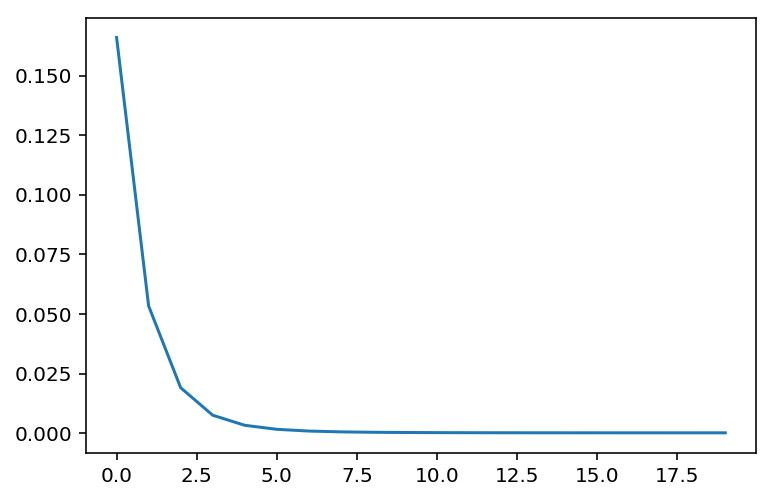

In [38]:
# Estimamos los parametros del modelo y = log(1+w0*abs(x)) + w1*x
import theano
import theano.tensor as T

X = T.scalar()
Y = T.scalar()

def modelo(X):
    return(T.log(1 + w_0*abs(X)) + w_1*X)

w_0 = theano.shared(np.asarray(0., dtype = theano.config.floatX))
w_1 = theano.shared(np.asarray(0., dtype = theano.config.floatX))
y = modelo(X)

cost = T.mean(T.sqr(y-Y))
gradiente_w0 = T.grad(cost=cost, wrt = w_0)
gradiente_w1 = T.grad(cost=cost, wrt = w_1)
updates = [[w_0, w_0 - gradiente_w0 * 0.01], [w_1, w_1 - gradiente_w1 * 0.01]]

f_entrenamiento = theano.function(inputs = [X,Y], outputs = cost, updates = updates)
costes = []
parametros = []
for i in range(20):
    for x,y in zip (trX, trY):
        cost_i = f_entrenamiento(x,y)
    costes.append(cost_i)
    parametros.append([w_0.get_value(),w_1.get_value()])
    print ('En el paso', i, 'el valor de los parametros es w0:', w_0.get_value(),'w1:', w_1.get_value())
    
plt.plot(costes)


En la grafica puede verse que se llega a la solucion en la cuarta iteracion 

In [42]:
print('Los parametros del modelo son: w_0=',parametros[3][0],
      'y w_1=',parametros[3][1]
     )

Los parametros del modelo son: w_0= 0.410275293590915 y w_1= 0.31603944633098685
